# 넷플릭스를 통한 대한민국 영화와 드라마 콘텐츠 분석 

## 주제 선정이유
최근 케이팝이나 한류 드라마 혹은 영화가 전세계적으로 주목을 받으면서 한류콘텐츠가 급부상하고 있다. 그 중에서 대한민국 드라마와 영화는 넷플릭스를 통해 다양한 나라에 공급되고 있다. 따라서 넷플릭스의 영화, 드라마 데이터를 가지고 대한민국 드라마와 영황에 대해 더 알아보려고 한다.

## 가설 혹은 명제
#### 가설1. 대한민국 영화와 드라마의 수요가 가장 높은 지역은 대한민국이 속해있는 아시아일 것이다.
#### 가설2. 대한민국 영화와 드라마의 수요가 가장 높은 나라는 대한민국과 가장 근접한 일본일 것이다.
#### 가설3.  아시아는 다른 지역과 다르게 오징어 게임 출시 이후와 이전의 대한민국 영화와 드라마의 수요 차이가 가장 적을 것이다.

## 인터넷을 통한 데이터 획득

top10.netflix.com에서 2021.7.6~2022.10.23까지 각 나라별 영화, 드라마 Top 10 모음을 다운받았다.

## 분석을 위한 데이터 가공

먼저 top10.netflix.com에서 2021.7.6~2022.10.23까지 각 나라별 영화, 드라마 Top 10 모음을 다운받았다. 그 이후에 엑셀로 영화, 드라마 이름의 값이 중복되지 않도록 정리하였다. 정리한 결과, 영화, 드라마가 약 3700개였다. 약 3700개의 영화, 드라마를 인터넷에 검색해서 대한민국 영화, 드라마 콘텐츠를 엄선하였다. 엄선한 결과 대한민국 영화, 드라마는 약 170개였다. 그 이후 내가 선정한 나라들의 데이터에서 대한민국 영화, 드라마 콘텐츠만 골라내였다.

(엑셀로 가공한 데이터는 별첨)

In [1]:
import pandas as pd 

df_Japan=pd.read_excel("./Japan netflix top 10.xlsx")

df_Japan

,country_name,week,weekly_rank,show_title
0,Japan,2022-10-23,5,20th Century Girl
1,Japan,2022-10-23,1,Little Women
2,Japan,2022-10-23,3,Missing: The Other Side
3,Japan,2022-10-23,4,Extraordinary Attorney Woo
4,Japan,2022-10-23,6,Under the Queen's Umbrella
...,...,...,...,...
466,Japan,2021-07-04,3,Vincenzo
467,Japan,2021-07-04,7,Crash Landing on You
468,Japan,2021-07-04,8,"Nevertheless,"
469,Japan,2021-07-04,9,Love (ft. Marriage and Divorce)


엑셀로 분석한 데이터는 다음과 같은 형태이다. 다음 형식의 데이터에서 분석의 편리함을 위해 week의 부분을 year, month, day로 분리하기로 하였다. 또한 year, month, day의 type을 int로 바꾸어주었다. 

In [2]:
df_Japan['year']=df_Japan['week'].str[0:4].astype(int)
df_Japan['month']=df_Japan['week'].str[5:7].astype(int)
df_Japan['day']=df_Japan['week'].str[8:10].astype(int)
df_Japan=df_Japan[['country_name','weekly_rank','show_title','year','month','day']]

df_Japan

,country_name,weekly_rank,show_title,year,month,day
0,Japan,5,20th Century Girl,2022,10,23
1,Japan,1,Little Women,2022,10,23
2,Japan,3,Missing: The Other Side,2022,10,23
3,Japan,4,Extraordinary Attorney Woo,2022,10,23
4,Japan,6,Under the Queen's Umbrella,2022,10,23
...,...,...,...,...,...,...
466,Japan,3,Vincenzo,2021,7,4
467,Japan,7,Crash Landing on You,2021,7,4
468,Japan,8,"Nevertheless,",2021,7,4
469,Japan,9,Love (ft. Marriage and Divorce),2021,7,4


또한 가설3의 분석의 편리함을 위해 각 나라별로 weekly_rank, show_title, year, month, day를 한 리스트로 묶어 그 묶음을 하나의 요소로 가지는 리스트를 만들었다.    

In [3]:
list_Japan=[]
for i in range(0,471):
    list_Japan.append(list(df_Japan.iloc[i,1:6]))
    
list_Japan

[[5, '20th Century Girl', 2022, 10, 23],
 [1, 'Little Women', 2022, 10, 23],
 [3, 'Missing: The Other Side', 2022, 10, 23],
 [4, 'Extraordinary Attorney Woo', 2022, 10, 23],
 [6, "Under the Queen's Umbrella", 2022, 10, 23],
 [8, 'Crash Landing on You', 2022, 10, 23],
 [1, 'Little Women', 2022, 10, 16],
 [3, 'Extraordinary Attorney Woo', 2022, 10, 16],
 [6, 'Crash Landing on You', 2022, 10, 16],
 [7, 'Glitch', 2022, 10, 16],
 [8, 'Missing: The Other Side', 2022, 10, 16],
 [1, 'Little Women', 2022, 10, 9],
 [3, 'Extraordinary Attorney Woo', 2022, 10, 9],
 [8, 'Crash Landing on You', 2022, 10, 9],
 [9, 'Itaewon Class', 2022, 10, 9],
 [10, 'Kingdom', 2022, 10, 9],
 [1, 'Little Women', 2022, 10, 2],
 [2, 'Extraordinary Attorney Woo', 2022, 10, 2],
 [8, 'Itaewon Class', 2022, 10, 2],
 [9, 'Crash Landing on You', 2022, 10, 2],
 [1, 'Little Women', 2022, 9, 25],
 [2, 'Extraordinary Attorney Woo', 2022, 9, 25],
 [5, 'Itaewon Class', 2022, 9, 25],
 [7, 'Narco-Saints', 2022, 9, 25],
 [9, 'Alchemy

나머지 나라들의 데이터 또한 위의 방식대로 모두 가공해주었다

In [4]:
df_Taiwan=pd.read_excel("./Taiwan netflix top 10.xlsx")

df_Taiwan['year']=df_Taiwan['week'].str[0:4].astype(int)
df_Taiwan['month']=df_Taiwan['week'].str[5:7].astype(int)
df_Taiwan['day']=df_Taiwan['week'].str[8:10].astype(int)
df_Taiwan=df_Taiwan[['country_name','weekly_rank','show_title','year','month','day']]

list_Taiwan=[]
for i in range(0,416):
    list_Taiwan.append(list(df_Taiwan.iloc[i,1:6]))

In [5]:
df_Vietnam=pd.read_excel("./Vietnam neflix top 10.xlsx")

df_Vietnam['year']=df_Vietnam['week'].str[0:4].astype(int)
df_Vietnam['month']=df_Vietnam['week'].str[5:7].astype(int)
df_Vietnam['day']=df_Vietnam['week'].str[8:10].astype(int)
df_Vietnam=df_Vietnam[['country_name','weekly_rank','show_title','year','month','day']]

list_Vietnam=[]
for i in range(0,506):
    list_Vietnam.append(list(df_Vietnam.iloc[i,1:6]))

In [6]:
df_Canada=pd.read_excel("./Canada netflix top 10.xlsx")

df_Canada['year']=df_Canada['week'].str[0:4].astype(int)
df_Canada['month']=df_Canada['week'].str[5:7].astype(int)
df_Canada['day']=df_Canada['week'].str[8:10].astype(int)
df_Canada=df_Canada[['country_name','weekly_rank','show_title','year','month','day']]

list_Canada=[]
for i in range(0,27):
    list_Canada.append(list(df_Canada.iloc[i,1:6]))

In [7]:
df_UnitedStates=pd.read_excel("./United States neflix top 10.xlsx")

df_UnitedStates['year']=df_UnitedStates['week'].str[0:4].astype(int)
df_UnitedStates['month']=df_UnitedStates['week'].str[5:7].astype(int)
df_UnitedStates['day']=df_UnitedStates['week'].str[8:10].astype(int)
df_UnitedStates=df_UnitedStates[['country_name','weekly_rank','show_title','year','month','day']]

list_UnitedStates=[]
for i in range(0,27):
    list_UnitedStates.append(list(df_UnitedStates.iloc[i,1:6]))

In [8]:
df_Mexico=pd.read_excel("./Mexico neflix top 10.xlsx")

df_Mexico['year']=df_Mexico['week'].str[0:4].astype(int)
df_Mexico['month']=df_Mexico['week'].str[5:7].astype(int)
df_Mexico['day']=df_Mexico['week'].str[8:10].astype(int)
df_Mexico=df_Mexico[['country_name','weekly_rank','show_title','year','month','day']]

list_Mexico=[]
for i in range(0,92):
    list_Mexico.append(list(df_Mexico.iloc[i,1:6]))

In [9]:
df_Brazil=pd.read_excel("./Brazil neflix top 10.xlsx")

df_Brazil['year']=df_Brazil['week'].str[0:4].astype(int)
df_Brazil['month']=df_Brazil['week'].str[5:7].astype(int)
df_Brazil['day']=df_Brazil['week'].str[8:10].astype(int)
df_Brazil=df_Brazil[['country_name','weekly_rank','show_title','year','month','day']]

list_Brazil=[]
for i in range(0,63):
    list_Brazil.append(list(df_Brazil.iloc[i,1:6]))

In [10]:
df_Chile=pd.read_excel("./Chile netflix top 10.xlsx")

df_Chile['year']=df_Chile['week'].str[0:4].astype(int)
df_Chile['month']=df_Chile['week'].str[5:7].astype(int)
df_Chile['day']=df_Chile['week'].str[8:10].astype(int)
df_Chile=df_Chile[['country_name','weekly_rank','show_title','year','month','day']]

list_Chile=[]
for i in range(0,81):
    list_Chile.append(list(df_Chile.iloc[i,1:6]))

In [11]:
df_Honduras=pd.read_excel("./Honduras netflix top 10.xlsx")

df_Honduras['year']=df_Honduras['week'].str[0:4].astype(int)
df_Honduras['month']=df_Honduras['week'].str[5:7].astype(int)
df_Honduras['day']=df_Honduras['week'].str[8:10].astype(int)
df_Honduras=df_Honduras[['country_name','weekly_rank','show_title','year','month','day']]

list_Honduras=[]
for i in range(0,89):
    list_Honduras.append(list(df_Honduras.iloc[i,1:6]))

In [12]:
df_UnitedKingdom=pd.read_excel("./United Kingdom netflix top 10.xlsx")

df_UnitedKingdom['year']=df_UnitedKingdom['week'].str[0:4].astype(int)
df_UnitedKingdom['month']=df_UnitedKingdom['week'].str[5:7].astype(int)
df_UnitedKingdom['day']=df_UnitedKingdom['week'].str[8:10].astype(int)
df_UnitedKingdom=df_UnitedKingdom[['country_name','weekly_rank','show_title','year','month','day']]

list_UnitedKingdom=[]
for i in range(0,24):
    list_UnitedKingdom.append(list(df_UnitedKingdom.iloc[i,1:6]))

In [13]:
df_France=pd.read_excel("./France netflix top 10.xlsx")

df_France['year']=df_France['week'].str[0:4].astype(int)
df_France['month']=df_France['week'].str[5:7].astype(int)
df_France['day']=df_France['week'].str[8:10].astype(int)
df_France=df_France[['country_name','weekly_rank','show_title','year','month','day']]

list_France=[]
for i in range(0,35):
    list_France.append(list(df_France.iloc[i,1:6]))

In [14]:
df_Germany=pd.read_excel("./Germany netflix top 10.xlsx")

df_Germany['year']=df_Germany['week'].str[0:4].astype(int)
df_Germany['month']=df_Germany['week'].str[5:7].astype(int)
df_Germany['day']=df_Germany['week'].str[8:10].astype(int)
df_Germany=df_Germany[['country_name','weekly_rank','show_title','year','month','day']]

list_Germany=[]
for i in range(0,29):
    list_Germany.append(list(df_Germany.iloc[i,1:6]))

In [15]:
df_SouthAfrica=pd.read_excel("./South Africa netflix top 10.xlsx")

df_SouthAfrica['year']=df_SouthAfrica['week'].str[0:4].astype(int)
df_SouthAfrica['month']=df_SouthAfrica['week'].str[5:7].astype(int)
df_SouthAfrica['day']=df_SouthAfrica['week'].str[8:10].astype(int)
df_SouthAfrica=df_SouthAfrica[['country_name','weekly_rank','show_title','year','month','day']]

list_SouthAfrica=[]
for i in range(0,39):
    list_SouthAfrica.append(list(df_SouthAfrica.iloc[i,1:6]))

In [16]:
df_Nigeria=pd.read_excel("./Nigeria netflix top 10.xlsx")

df_Nigeria['year']=df_Nigeria['week'].str[0:4].astype(int)
df_Nigeria['month']=df_Nigeria['week'].str[5:7].astype(int)
df_Nigeria['day']=df_Nigeria['week'].str[8:10].astype(int)
df_Nigeria=df_Nigeria[['country_name','weekly_rank','show_title','year','month','day']]

list_Nigeria=[]
for i in range(0,171):
    list_Nigeria.append(list(df_Nigeria.iloc[i,1:6]))

In [17]:
df_Egypt=pd.read_excel("./Egypt netflix top 10.xlsx")

df_Egypt['year']=df_Egypt['week'].str[0:4].astype(int)
df_Egypt['month']=df_Egypt['week'].str[5:7].astype(int)
df_Egypt['day']=df_Egypt['week'].str[8:10].astype(int)
df_Egypt=df_Egypt[['country_name','weekly_rank','show_title','year','month','day']]

list_Egypt=[]
for i in range(0,67):
    list_Egypt.append(list(df_Egypt.iloc[i,1:6]))

In [18]:
df_Australia=pd.read_excel("./Australia netflix top 10.xlsx")

df_Australia['year']=df_Australia['week'].str[0:4].astype(int)
df_Australia['month']=df_Australia['week'].str[5:7].astype(int)
df_Australia['day']=df_Australia['week'].str[8:10].astype(int)
df_Australia=df_Australia[['country_name','weekly_rank','show_title','year','month','day']]

list_Australia=[]
for i in range(0,32):
    list_Australia.append(list(df_Australia.iloc[i,1:6]))

In [19]:
df_NewZealand=pd.read_excel("./New Zealand netflix top 10.xlsx")

df_NewZealand['year']=df_NewZealand['week'].str[0:4].astype(int)
df_NewZealand['month']=df_NewZealand['week'].str[5:7].astype(int)
df_NewZealand['day']=df_NewZealand['week'].str[8:10].astype(int)
df_NewZealand=df_NewZealand[['country_name','weekly_rank','show_title','year','month','day']]

list_NewZealand=[]
for i in range(0,39):
    list_NewZealand.append(list(df_NewZealand.iloc[i,1:6]))

In [20]:
df_NewCaledonia=pd.read_excel("./New Caledonia netflix top 10.xlsx")

df_NewCaledonia['year']=df_NewCaledonia['week'].str[0:4].astype(int)
df_NewCaledonia['month']=df_NewCaledonia['week'].str[5:7].astype(int)
df_NewCaledonia['day']=df_NewCaledonia['week'].str[8:10].astype(int)
df_NewCaledonia=df_NewCaledonia[['country_name','weekly_rank','show_title','year','month','day']]

list_NewCaledonia=[]
for i in range(0,47):
    list_NewCaledonia.append(list(df_NewCaledonia.iloc[i,1:6]))

In [21]:
df_Indonesia=pd.read_excel("./Indonesia netflix top 10.xlsx")

df_Indonesia['year']=df_Indonesia['week'].str[0:4].astype(int)
df_Indonesia['month']=df_Indonesia['week'].str[5:7].astype(int)
df_Indonesia['day']=df_Indonesia['week'].str[8:10].astype(int)
df_Indonesia=df_Indonesia[['country_name','weekly_rank','show_title','year','month','day']]

In [22]:
df_Indonesia=pd.read_excel("./Indonesia netflix top 10.xlsx")

df_Indonesia['year']=df_Indonesia['week'].str[0:4].astype(int)
df_Indonesia['month']=df_Indonesia['week'].str[5:7].astype(int)
df_Indonesia['day']=df_Indonesia['week'].str[8:10].astype(int)
df_Indonesia=df_Indonesia[['country_name','weekly_rank','show_title','year','month','day']]

In [23]:
df_Malaysia=pd.read_excel("./Malaysia netflix top 10.xlsx")

df_Malaysia['year']=df_Malaysia['week'].str[0:4].astype(int)
df_Malaysia['month']=df_Malaysia['week'].str[5:7].astype(int)
df_Malaysia['day']=df_Malaysia['week'].str[8:10].astype(int)
df_Malaysia=df_Malaysia[['country_name','weekly_rank','show_title','year','month','day']]

## 분석 결과

### 가설 1

#### 각 나라별 대한민국 영화와 드라마로 인한 점수를 부여해주는 함수

In [24]:
def Point(L):
    sum=0
    for i in L:
        sum+=11-i
    return sum

##### 아시아

In [25]:
Point_Japan=Point(dict(df_Japan['weekly_rank']).values())
Point_Taiwan=Point(dict(df_Taiwan['weekly_rank']).values())
Point_Vietnam=Point(dict(df_Vietnam['weekly_rank']).values())
Point_Asia=Point_Japan + Point_Taiwan + Point_Vietnam
print(f"아시아 점수:{Point_Asia}")

아시아 점수:8156


#### 북중미

In [26]:
Point_Canada=Point(dict(df_Canada['weekly_rank']).values())
Point_UnitedStates=Point(dict(df_UnitedStates['weekly_rank']).values())
Point_Mexico=Point(dict(df_Mexico['weekly_rank']).values())
Point_NorthMiddleAmerica=Point_Canada + Point_UnitedStates + Point_Mexico
print(f"북중미 점수:{Point_NorthMiddleAmerica}")

북중미 점수:779


#### 남아메리카

In [27]:
Point_Brazil=Point(dict(df_Brazil['weekly_rank']).values())
Point_Chile=Point(dict(df_Chile['weekly_rank']).values())
Point_Honduras=Point(dict(df_Honduras['weekly_rank']).values())
Point_SouthAmerica=Point_Brazil + Point_Chile + Point_Honduras
print(f"남아메리카 점수:{Point_SouthAmerica}")

남아메리카 점수:1127


#### 유럽

In [28]:
Point_UnitedKingdom=Point(dict(df_UnitedKingdom['weekly_rank']).values())
Point_France=Point(dict(df_France['weekly_rank']).values())
Point_Germany=Point(dict(df_Germany['weekly_rank']).values())
Point_Europe=Point_UnitedKingdom + Point_France + Point_Germany
print(f"유럽 점수:{Point_Europe}")

유럽 점수:573


#### 아프리카

In [29]:
Point_SouthAfrica=Point(dict(df_SouthAfrica['weekly_rank']).values())
Point_Nigeria=Point(dict(df_Nigeria['weekly_rank']).values())
Point_Egypt=Point(dict(df_Egypt['weekly_rank']).values())
Point_Africa=Point_SouthAfrica + Point_Nigeria + Point_Egypt
print(f"아프리카 점수:{Point_Africa}")

아프리카 점수:1582


#### 오세아니아

In [30]:
Point_Australia=Point(dict(df_Australia['weekly_rank']).values())
Point_NewZealand=Point(dict(df_NewZealand['weekly_rank']).values())
Point_NewCaledonia=Point(dict(df_NewCaledonia['weekly_rank']).values())
Point_Oceania=Point_Australia + Point_NewZealand + Point_NewCaledonia
print(f"오세아니아 점수:{Point_Oceania}")

오세아니아 점수:657


#### 대륙별 점수 정리

파이썬으로 엑셀 데이터를 만드는 방법을 몰라 위에 데이터를 바탕으로 다시 엑셀을 만들었다.

In [31]:
df_Continent_Point=pd.read_excel("./Continent Point.xlsx")

df_Continent_Point

,Continent,Point
0,Asia,8156
1,NorthMiddleAmerica,779
2,SouthAmerica,1127
3,Europe,573
4,Africa,1582
5,Oceania,657


<AxesSubplot:>

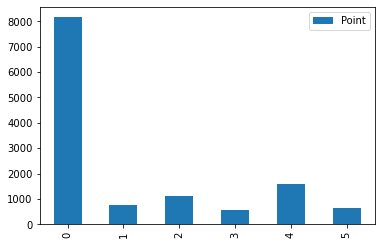

In [61]:
df_Continent_Point.plot.bar()

# 0:아시아 1:북중미 2:남아메리카 3:유럽 4:아프리카 5:오세아니아
# y축:점수

### 가설 2

#### 일본

In [33]:
Point_Japan=Point(dict(df_Japan['weekly_rank']).values())
print(f"일본 점수:{Point_Japan}")

일본 점수:2719


#### 대만

In [34]:
Point_Taiwan=Point(dict(df_Taiwan['weekly_rank']).values())
print(f"대만 점수:{Point_Taiwan}")

대만 점수:2487


#### 베트남

In [35]:
Point_Vietnam=Point(dict(df_Vietnam['weekly_rank']).values())
print(f"베트남 점수:{Point_Vietnam}")

베트남 점수:2950


#### 인도네시아

In [36]:
Point_Indonesia=Point(dict(df_Indonesia['weekly_rank']).values())
print(f"인도네시아 점수:{Point_Indonesia}")

인도네시아 점수:2830


#### 말레이시아

In [37]:
Point_Malaysia=Point(dict(df_Malaysia['weekly_rank']).values())
print(f"말레이시아 점수:{Point_Malaysia}")

말레이시아 점수:2430


#### 나라별 점수 정리

In [38]:
df_Country_Point=pd.read_excel("./Country Point.xlsx")

df_Country_Point

,Country,Point
0,Japan,2719
1,Taiwan,2487
2,Vietnam,2950
3,Indonesia,2830
4,Malaysia,2430


<AxesSubplot:>

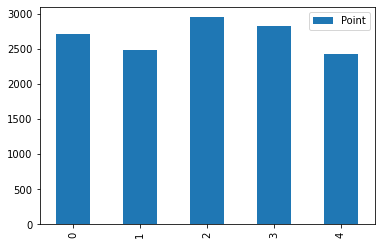

In [62]:
df_Country_Point.plot.bar()

# 0:일본 1:대만 2:베트남 3:인도네시아 4:말레이시아
# Y축:점수

### 가설 3

#### 각 나라별 오징어 게임 출시 전 두 달 동안의 (2021.7.6~2021.9.16) 점수를 계산해주는 함수

In [40]:
def Point_BeforeSG(L):
    sum=0
    for i in L:
        if i[1]!='Squid Game':
            if i[2]==2021:
                if i[3]==8 or i[3]==7:
                    sum+=11-i[0]
                elif i[3]==9:
                    if i[4]<17:
                        sum+=11-i[0]
    return sum

#### 각 나라별 오징어 게임 출시 후 두 달 동안 (2021.11.6~2022.1.16) 의 점수를 계산해주는 함수
오징어 게임 출시일인 2021.9.17일을 기준으로 두 달 데이터를 쓰지 않은 이유는 오징어 게임의 성공 이후 대한민국 콘텐츠에 대한 관심도를 측정하고 싶어서 오징어 게임이 출시되고 관심이 조금 줄은 11월 기준으로 두 달 데이터를 선정하였다. 오징어 게임 출시일을 기준으로 측정하게 될 경우 오징어 게임으로 인한 대한민국 콘텐츠에 대한 관심도 증가를 효과적으로 파악할 수 없다.

In [41]:
def Point_AfterSG(L):
    sum=0
    for i in L: 
        if i[1]!='Squid Game':
            if i[2]==2021:
                if i[3]==11:
                    if i[4]>=6:
                        sum+=11-i[0]
                if i[3]==12:
                    sum+=11-i[0]
            if i[2]==2022:
                if i[3]==1:
                    if i[4]<17:
                        sum+=11-i[0]
    return sum

#### 아시아

In [42]:
Point_BeforeSG_Asia= Point_BeforeSG(list_Japan) + Point_BeforeSG(list_Taiwan) + Point_BeforeSG(list_Vietnam)
Point_AfterSG_Asia=Point_AfterSG(list_Japan) + Point_AfterSG(list_Taiwan) + Point_AfterSG(list_Vietnam)

print(f"아시아의 오징어 게임 출시 전 점수:{Point_BeforeSG_Asia}")
print(f"아시아의 오징어 게임 출시 후 점수:{Point_AfterSG_Asia}")
print(f"아시아 점수 증감률:{(Point_AfterSG_Asia-Point_BeforeSG_Asia)/Point_BeforeSG_Asia*100}%")

아시아의 오징어 게임 출시 전 점수:1499
아시아의 오징어 게임 출시 후 점수:1146
아시아 점수 증감률:-23.549032688458972%


#### 북중미

In [43]:
Point_BeforeSG_NorthMiddleAmerica= Point_BeforeSG(list_Canada) + Point_BeforeSG(list_UnitedStates) + Point_BeforeSG(list_Mexico)
Point_AfterSG_NorthMiddleAmerica=Point_AfterSG(list_Canada) + Point_AfterSG(list_UnitedStates) + Point_AfterSG(list_Mexico)

print(f"북중미의 오징어 게임 출시 전 점수:{Point_BeforeSG_NorthMiddleAmerica}")
print(f"북중미의 오징어 게임 출시 후 점수:{Point_AfterSG_NorthMiddleAmerica}")
print(f"북중미 점수 증감률:{(Point_AfterSG_NorthMiddleAmerica-Point_BeforeSG_NorthMiddleAmerica)/Point_BeforeSG_NorthMiddleAmerica*100}%")

북중미의 오징어 게임 출시 전 점수:13
북중미의 오징어 게임 출시 후 점수:73
북중미 점수 증감률:461.5384615384615%


##### 남아메리카

In [44]:
Point_BeforeSG_SouthAmerica= Point_BeforeSG(list_Brazil) + Point_BeforeSG(list_Chile) + Point_BeforeSG(list_Honduras)
Point_AfterSG_SouthAmerica=Point_AfterSG(list_Brazil) + Point_AfterSG(list_Chile) + Point_AfterSG(list_Honduras)

print(f"남아메리카의 오징어 게임 출시 전 점수:{Point_BeforeSG_SouthAmerica}")
print(f"남아메리카의 오징어 게임 출시 후 점수:{Point_AfterSG_SouthAmerica}")
print(f"남아메리카 점수 증감률:{(Point_AfterSG_SouthAmerica-Point_BeforeSG_SouthAmerica)/Point_BeforeSG_SouthAmerica*100}%")

남아메리카의 오징어 게임 출시 전 점수:43
남아메리카의 오징어 게임 출시 후 점수:127
남아메리카 점수 증감률:195.3488372093023%


##### 유럽

In [45]:
Point_BeforeSG_Europe= Point_BeforeSG(list_UnitedKingdom) + Point_BeforeSG(list_France) + Point_BeforeSG(list_Germany)
Point_AfterSG_Europe=Point_AfterSG(list_UnitedKingdom) + Point_AfterSG(list_France) + Point_AfterSG(list_Germany)

print(f"유럽의 오징어 게임 출시 전 점수:{Point_BeforeSG_Europe}")
print(f"유럽의 오징어 게임 출시 후 점수:{Point_AfterSG_Europe}")
print(f"유럽 점수 증감률:{(Point_AfterSG_Europe-Point_BeforeSG_Europe)/Point_BeforeSG_Europe*100}%")

유럽의 오징어 게임 출시 전 점수:9
유럽의 오징어 게임 출시 후 점수:65
유럽 점수 증감률:622.2222222222223%


#### 아프리카

In [46]:
Point_BeforeSG_Africa= Point_BeforeSG(list_SouthAfrica) + Point_BeforeSG(list_Nigeria) + Point_BeforeSG(list_Egypt)
Point_AfterSG_Africa=Point_AfterSG(list_SouthAfrica) + Point_AfterSG(list_Nigeria) + Point_AfterSG(list_Egypt)

print(f"아프리카의 오징어 게임 출시 전 점수:{Point_BeforeSG_Africa}")
print(f"아프리카의 오징어 게임 출시 후 점수:{Point_AfterSG_Africa}")
print(f"아프리카 점수 증감률:{(Point_AfterSG_Africa-Point_BeforeSG_Africa)/Point_BeforeSG_Africa*100}%")

아프리카의 오징어 게임 출시 전 점수:100
아프리카의 오징어 게임 출시 후 점수:182
아프리카 점수 증감률:82.0%


#### 오세아니아

In [47]:
Point_BeforeSG_Oceania= Point_BeforeSG(list_Australia) + Point_BeforeSG(list_NewZealand) + Point_BeforeSG(list_NewCaledonia)
Point_AfterSG_Oceania=Point_AfterSG(list_Australia) + Point_AfterSG(list_NewZealand) + Point_AfterSG(list_NewCaledonia)

print(f"오세아니아의 오징어 게임 출시 전 점수:{Point_BeforeSG_Oceania}")
print(f"오세아니아의 오징어 게임 출시 후 점수:{Point_AfterSG_Oceania}")
print(f"오세아니아 점수 증감률:{(Point_AfterSG_Oceania-Point_BeforeSG_Oceania)/Point_BeforeSG_Oceania*100}%")

오세아니아의 오징어 게임 출시 전 점수:17
오세아니아의 오징어 게임 출시 후 점수:58
오세아니아 점수 증감률:241.17647058823528%


#### 대륙별 오징어 게임 출시 전과 후 점수 정리

In [48]:
df_SG=pd.read_excel("./BeforeAfter SG.xlsx")

df_SG

,Continent,Before SG,After SG
0,Asia,1499,1146
1,NorthMiddleAmerica,13,73
2,SouthAmerica,43,127
3,Europe,9,65
4,Africa,100,182
5,Oceania,17,58


<AxesSubplot:>

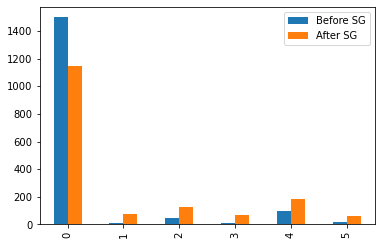

In [63]:
df_SG.plot.bar()

#0.아시아 1.북중미 2.남아메리카 3.유럽 4.아프리카 5.오세아니아
# y축:점수

In [50]:
df_ChangeRate=pd.read_excel("./Change Rate.xlsx")

df_ChangeRate

,Continent,Change Rate
0,Asia,-23
1,NorthMiddleAmerica,461
2,SouthAmerica,195
3,Europe,622
4,Africa,82
5,Oceania,241


<AxesSubplot:>

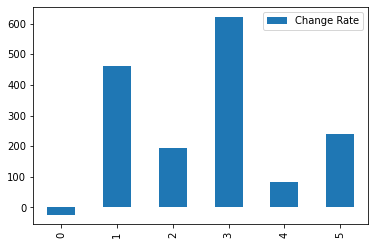

In [64]:
df_ChangeRate.plot.bar()

# 0.아시아 1.북중미 2.남아메리카 3.유럽 4.아프리카 5.오세아니아
# y축: 증감률

## 결론

### 가설1
데이터를 가지고 점수를 대륙별로 구해본 결과, 아시아가 8156점, 북중미가 779점, 남아메리카가 1127점, 유럽은 573점, 아프리카가 1582점, 오세아니아가 657점이 나왔다.

따라서 가설대로 아시아가 압도적으로 대한민국 드라마, 영화 콘텐츠의 수요가 높았다.

### 가설2
데이터를 가지고 대한민국 콘텐츠의 수요가 높다는 주요 국가 5개의 점수를 구해본 결과, 일본이 2719점, 대만이 2487점, 베트남이 2950점, 인도네시아가 2830점, 말레이시아가 2430점이 나왔다. 

5개 국가간의 점수가 비슷하게 나왔지만 근소한 차이로 베트남의 점수가 가장 높았다. 따라서 데이터를 분석한 결과 대한민국 콘텐츠의 수요가 가장 높은 나라는 일본인 아닌 베트남이었다.

### 가설3
데이터를 가지고 각 대륙별오징어 게임 출시 전과 후의 점수와 전과 후에 따른 점수 증감률을 계산해보았다. 아시아의 경우 출시 전 점수는 1499점, 출시 후 점수는 1146점으로 6개 대륙 중 유일하게 출시 후에 점수가 떨어졌으며 증감률은 약 -23%였다. 북중미의 경우 출시 전 점수는 13점, 출시 후 점수는 73점으로 증감률은 약 461%이다. 남아메리카의 경우 출시 전 점수는 43점, 출시 후 점수는 127점으로 증감률은 약 195%이다. 유럽의 경우 출시 전 점수는 9점, 출시 후 점수는 65점으로 증감률은 약 622%로 6개 대륙 중 가장 높은 점수 상승률을 보였다. 아프리카의 경우 출시 전 점수는 100점, 출시 후 점수는 182점으로 증감률은 약 82%였다. 마지막으로 오세아니아의 경우 출시 전 점수는 17점, 출시 후 점수는 58점을로 증감률은 약 241%이다. 

증감률로 보아 오징어 게임 출시 전과 후의 대한민국 콘텐츠 수요 차이가 가장 적은 곳은 아시아였다. 아시아의 경우 오징어 게임 출시 전과 후 모두 가장 높은 점수를 보였으나 유일하게 출시 후 점수가 출시 전 점수보다 낮은 대륙이었다.

## 참고문헌

Lecture 12_Pandas_1117 - 박상근 교수님